# Import Data and Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import pandas as pd

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# y_train = to_categorical(y_train)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


11501568/11490434 [==============================] - 0s 0us/step


# Print Shape Of input data

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

# Add one dimension to dataset

In [ ]:
image_size= 28
x_train_new = np.array(x_train).reshape(-1, image_size , image_size , 1)
x_test_new = np.array(x_test).reshape(-1, image_size , image_size , 1)
x_train_new.shape[1:]

(28, 28, 1)

# Make CNN model

In [ ]:
model = tf.keras.models.Sequential()
## first cnn layer
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = x_train_new.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# second cnn layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

# Train the model

In [ ]:
history = model.fit( x_train_new, y_train, epochs=30, validation_data=(x_test_new, y_test))

Epoch 1/30
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1683 - accuracy: 0.9472 - val_loss: 0.0615 - val_accuracy: 0.9806
Epoch 2/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0499 - val_accuracy: 0.9845
Epoch 3/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 4/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0426 - val_accuracy: 0.9879
Epoch 5/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0689 - val_accuracy: 0.9818
Epoch 6/30
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0453 - val_accuracy: 0.9887
Epoch 7/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0567 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Evaluate Single dataset

In [ ]:
predictions = model.predict(x_test_new)
print(np.argmax(predictions[1335]))

2


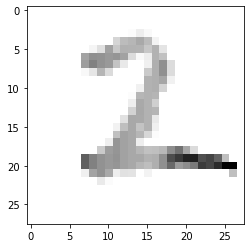

In [ ]:
plt.imshow(x_test[1335],cmap=plt.cm.binary)
plt.show()

# Evaluate Test set

In [ ]:
y_pred = model.predict(x_test_new)
# y_pred = np.argmax(y_pred);
y_pred=np.apply_along_axis(np.argmax, 1, y_pred)

# Build Confusion Metrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1133    0    1    0    0    0    0    1    0]
 [   0    0 1023    0    2    0    0    4    2    1]
 [   2    1    1  991    0    7    0    1    7    0]
 [   0    1    1    0  967    0    2    3    1    7]
 [   3    0    1    6    0  876    2    0    1    3]
 [   4    5    1    0    2    1  944    0    1    0]
 [   0    5    3    0    0    0    0 1017    1    2]
 [   2    0    3    0    1    0    0    3  963    2]
 [   0    0    1    0    6    4    0    3    3  992]]


0.9883

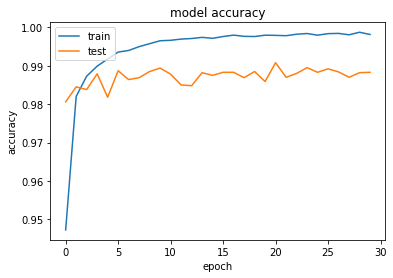

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


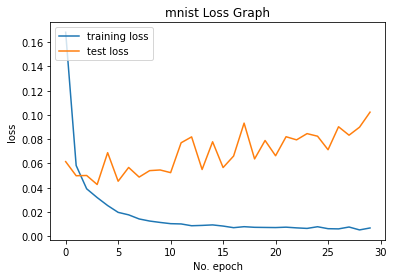

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('mnist Loss Graph')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()